# **Healthcare: Risk Assessment and Prevention Planning**

# **Predicting Cardiovascular Disease Using Logistic Regression**

**Coronary Heart Disease**

A cardiovascular disease occurs when the coronary arteries, which supply blood to heart muscle, become narrowed or blocked due to the buildup of cholesterol-containing deposits called **plaques**.

The causatives of CHD are,

1. Smoking
2. High BP
3. High Cholesterol Levels, etc...

# **Support Vector Machine (SVM) with RBF Kernel**
In my project, I had used an SVM model with a Radial Basis Function (RBF) kernel to predict cardiovascular disease risk.

## **SVM Basics**
**What It Does:**

SVM finds the best line (or hyperplane) that separates two classes of data. In your case, it separates people who are at risk of cardiovascular disease from those who are not.

**Support Vectors:**

These are the key data points that define the boundary between the two classes.

## **RBF Kernel**

**What It Does:**

The RBF kernel helps SVM handle more complex, non-linear relationships between features. It transforms the data into a higher dimension so that a clear boundary can be found.

**Why It’s Useful:**

It makes SVM effective for data that isn’t easily separable by a straight line.

In [ ]:
#FILLING  THE  MISSING(NA)  VALUES  WITH  MEAN  VALUES
import pandas as pd

df = pd.read_csv('/content/framingham_CVD.csv')

df_filled = df.fillna(df.mean())

df_filled.to_csv('/content/Filled_Farmingham.csv', index = False)

print('Task Completed')


Task Completed


# **EDA :** **Performing Univariate Analysis**

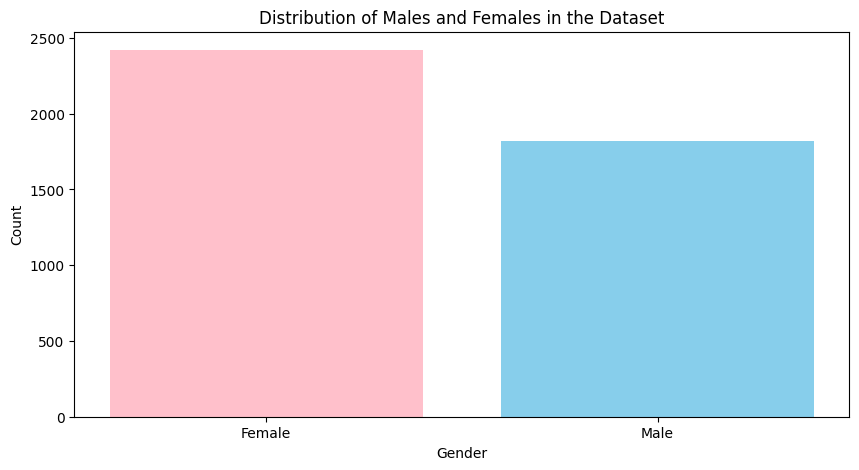

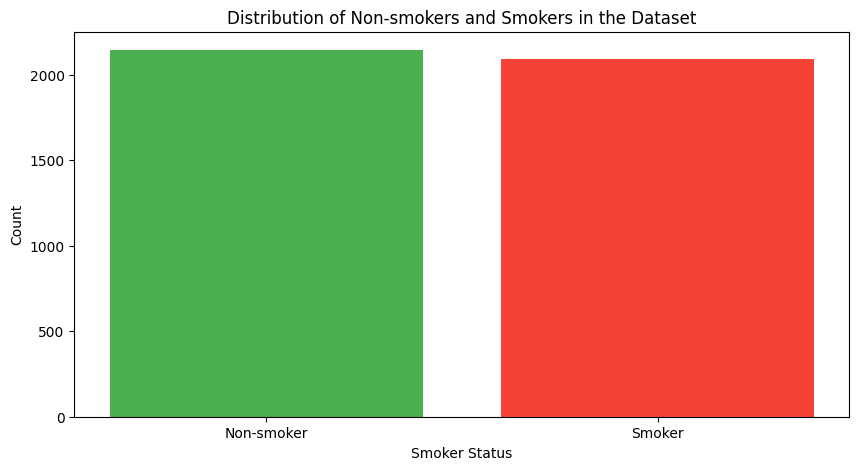

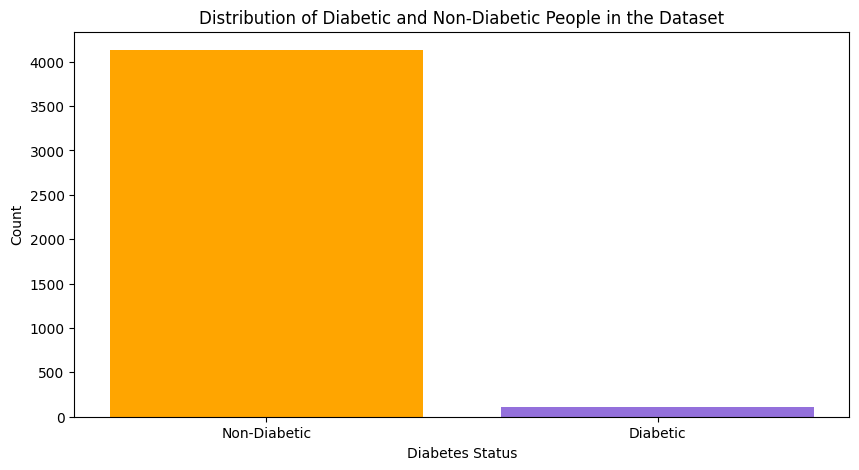

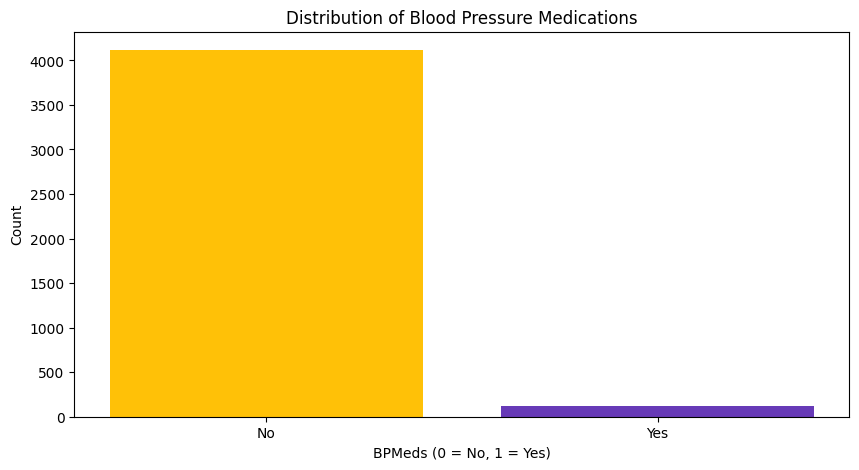

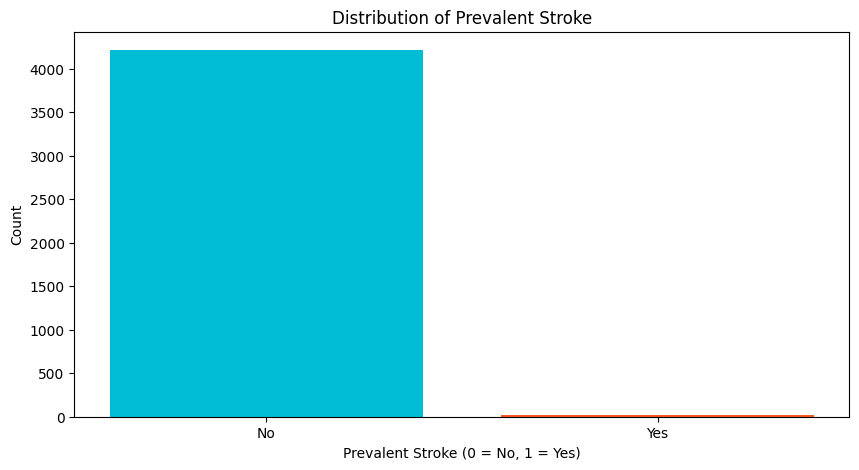

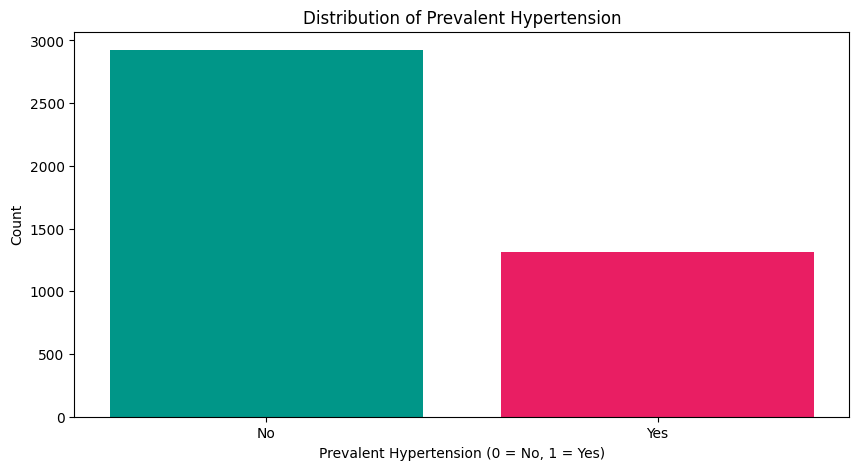

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Filled_Farmingham.csv')

# Bar plot for 'Male' feature (0 - Female, 1 - Male)
plt.figure(figsize=(10, 5))
gender = ['Female', 'Male']
male_counts = df['male'].value_counts()
plt.bar(gender, male_counts.values, color=['pink', 'skyblue'])
plt.title('Distribution of Males and Females in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for 'currentSmoker' variable (0 - non-Smoker, 1 - Smoker)
plt.figure(figsize=(10, 5))
smoker_status = ['Non-smoker', 'Smoker']
smoker_counts = df['currentSmoker'].value_counts()
plt.bar(smoker_status, smoker_counts, color=['#4CAF50', '#F44336'])
plt.title('Distribution of Non-smokers and Smokers in the Dataset')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.show()

# Bar plot for 'diabetes' variable (0 - Non-Diabetic, 1 - Diabetic)
plt.figure(figsize=(10, 5))
diabetes_status = ['Non-Diabetic', 'Diabetic']
diabetes_counts = df['diabetes'].value_counts()
plt.bar(diabetes_status, diabetes_counts, color=['#FFA500', '#9370DB'])
plt.title('Distribution of Diabetic and Non-Diabetic People in the Dataset')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

# Bar plot for 'BPMeds' feature (0 - No, 1 - Yes)
df = pd.read_csv('/content/Filled_Farmingham.csv')
plt.figure(figsize=(10, 5))
bpmeds_status = ['No', 'Yes']
bpmeds_counts = df['BPMeds'].value_counts()
plt.bar(bpmeds_status, bpmeds_counts, color=['#FFC107', '#673AB7'])
plt.title('Distribution of Blood Pressure Medications')
plt.xlabel('BPMeds (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Bar plot for 'prevalentStroke' feature (0 - No, 1 - Yes)
plt.figure(figsize=(10, 5))
stroke_status = ['No', 'Yes']
stroke_counts = df['prevalentStroke'].value_counts()
plt.bar(stroke_status, stroke_counts, color=['#00BCD4', '#FF5722'])
plt.title('Distribution of Prevalent Stroke')
plt.xlabel('Prevalent Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Bar plot for 'prevalentHyp' feature (0 - No, 1 - Yes)
plt.figure(figsize=(10, 5))
hyp_status = ['No', 'Yes']
hyp_counts = df['prevalentHyp'].value_counts()
plt.bar(hyp_status, hyp_counts, color=['#009688', '#E91E63'])
plt.title('Distribution of Prevalent Hypertension')
plt.xlabel('Prevalent Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


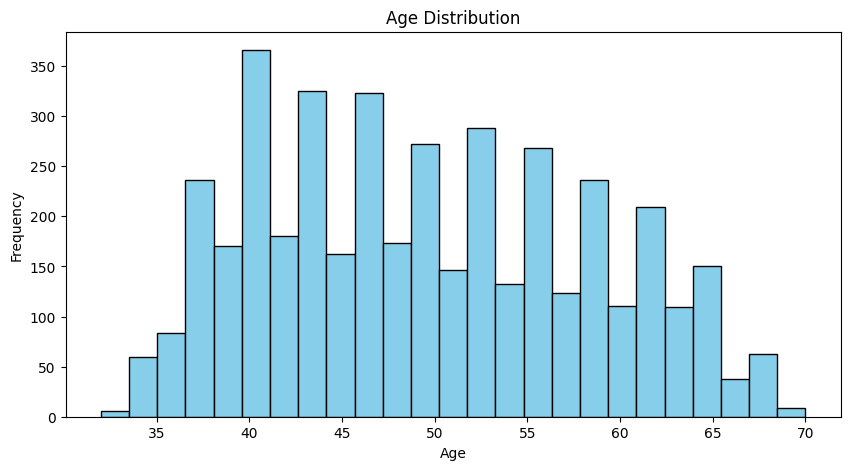

In [ ]:
# Histogram of 'Age' Distribution

plt.figure(figsize=(10,5))
plt.hist(df['age'], bins=25, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

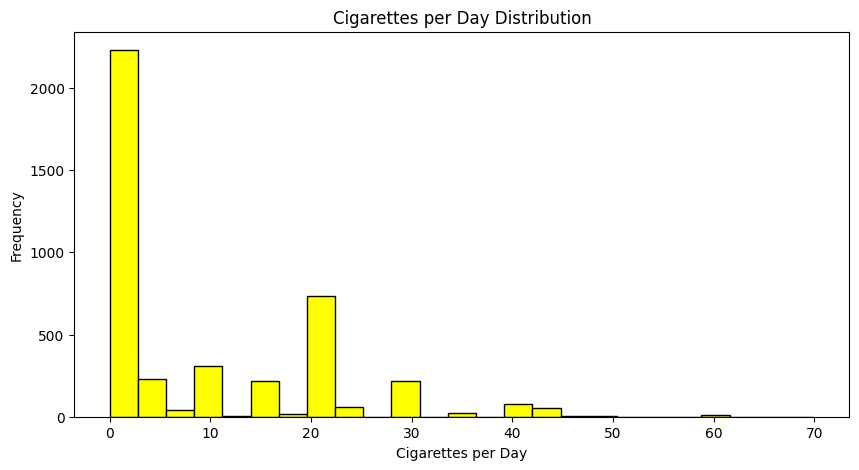

In [ ]:
# Histogram of 'No. of Cigaettes per Day' Distribution

plt.figure(figsize=(10,5))
plt.hist(df['cigsPerDay'], bins=25, color='yellow', edgecolor='black')
plt.title('Cigarettes per Day Distribution')
plt.xlabel('Cigarettes per Day')
plt.ylabel('Frequency')
plt.show()

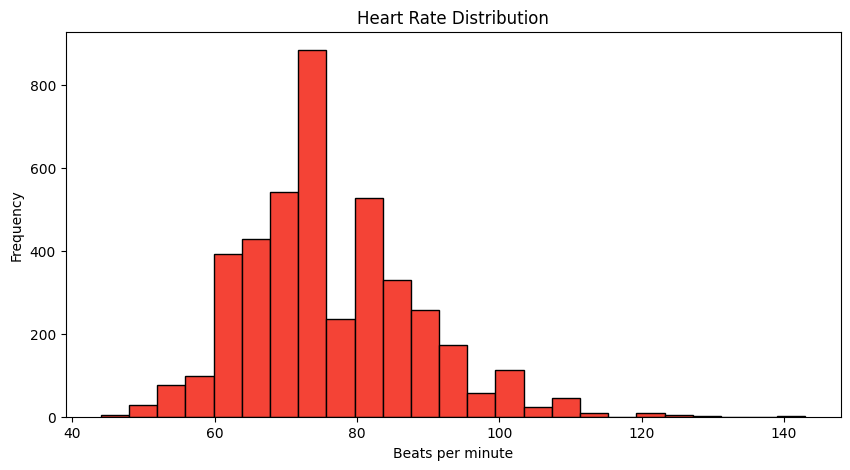

In [ ]:
# Histogram of 'Heart Rate' Distribution

plt.figure(figsize=(10,5))
plt.hist(df['heartRate'], bins=25, color='#F44336', edgecolor='black')
plt.title('Heart Rate Distribution')
plt.xlabel('Beats per minute')
plt.ylabel('Frequency')
plt.show()

# **EDA : Performing Bivariate Analysis**

<Figure size 1000x500 with 0 Axes>

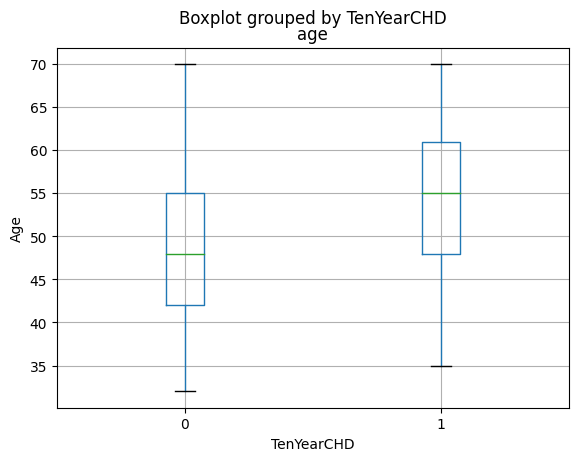

In [ ]:
# 1. Box Plot: Comparing age with TenYearCHD

plt.figure(figsize=(10, 5))
df.boxplot(column='age', by='TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Age')
plt.show()

Here, the box plot explain about the distribution of age and the 10-year risk of developing coronary heart disease (CHD). `1` represents positive prediction of high risk of developing CHD within 10 years. `0` represents positive prediction of low risk of developing CHD within 10 years. Mostly the 25th to 75th percentile of people who are at low risk are above the age of 40 and at 55. And people who are at high risk are above 45 and below 65 of age.

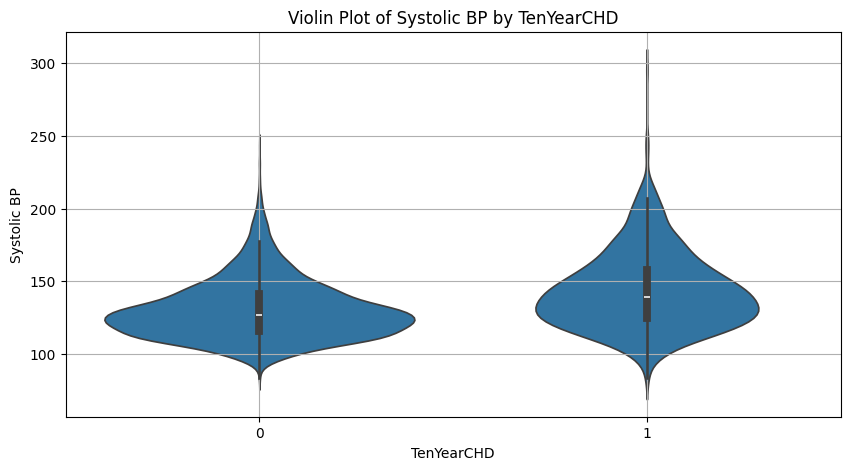

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.violinplot(x='TenYearCHD', y='sysBP', data=df)
plt.title('Violin Plot of Systolic BP by TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Systolic BP')
plt.grid(True)
plt.show()

`Systolic Blood Pressure (sysBP)` is the highest pressure in the arteries during the heartbeat when the heart's ventricles contract and pump blood out.

And its the measure of Cardiovascular health measured in millimeters of mercury (mmHg).

**Values and Interpretation:**
1. Normal Range: Less than 120.
2. Elevated Range: Between 120 and 129 mmHg.
3. Hypertension (High BP):
   - `Stage 1`: sysBP between 130 and 139 mmHg.
   - `Stage 2`: sysBP 140 mmHg or higher.
4. Hypertensive Crisis: sysBP more than 180 mmHg.

From our violin plot, we can conclude that:

1. The people at low risk of CHD i.e. '0' is mostly having a sysBP of less than 150 and a huge crowd between the values 120 and 130. The graph is more like `right-skewed` and `leptokurtic`

2. The people at high risk of CHD i.e. '1' is more likely a `mesokurtic` graph. Only Less number of people are among the 120 range. The values are distributed along the line till among 220.

By concluding, we came to know that the people having the Systolic Blood Pressure are more likely to have CHD.

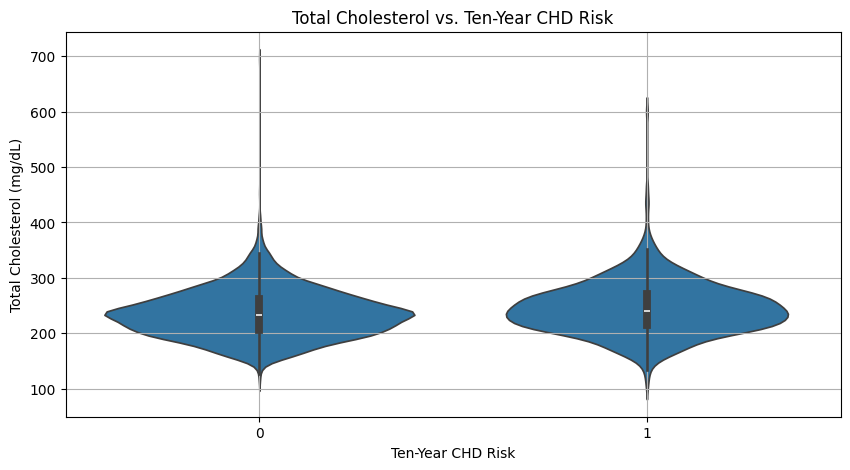

In [ ]:
# Plot Total Cholesterol vs. TenYearCHD
plt.figure(figsize=(10, 5))
sns.violinplot(x='TenYearCHD', y='totChol', data=df)
plt.title('Total Cholesterol vs. Ten-Year CHD Risk')
plt.xlabel('Ten-Year CHD Risk')
plt.ylabel('Total Cholesterol (mg/dL)')
plt.grid(True)
plt.show()

Here, the values are distributed more similarly in both `0` and `1`. For both curves, the high the more people are especially in the range of 200 to 290.

It's measured in milligrams per deciliter (mg/dL) of blood.

**Values and Interpretation:**

1. `Less than 200 mg/dL` : Desirable and low risk of heart disease.

2. `Between 200 and 239 mg/dL` : Borderline high

3. `240 mg/dL or greater`: High and high risk on cardiovascular diseases.

Finally, we conclude that the people have high risk of CHD i.e. `0` is having a borderline risk of developing Crdiovascular Disease. Since, they have the Total Cholesterol level of approximately less than 240.

And the people at `1` are likely to have a high rik of developing Cardiovascular disease.

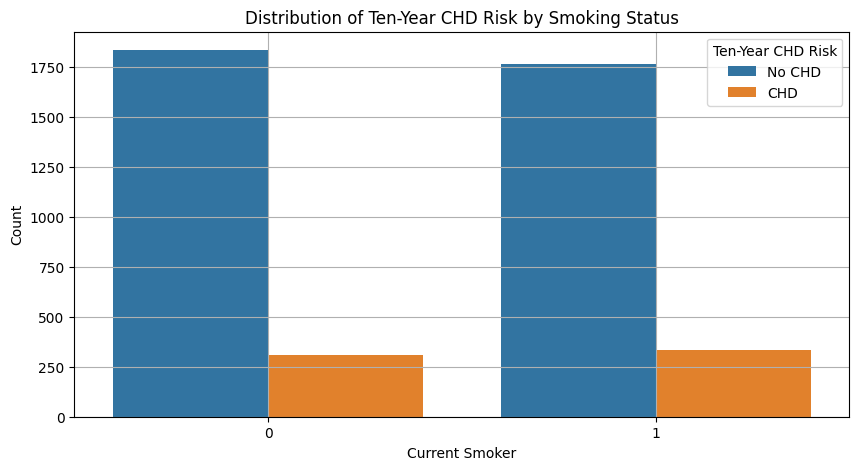

In [ ]:
# Plot Current smokers vs. Ten Year CHD Risk

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='currentSmoker', hue='TenYearCHD', data=df)
plt.title('Distribution of Ten-Year CHD Risk by Smoking Status')
plt.xlabel('Current Smoker')
plt.ylabel('Count')
plt.legend(title='Ten-Year CHD Risk', labels=['No CHD', 'CHD'])
plt.grid(True)
plt.show()

# **EDA: Performing Multivariate Analysis**

## **Correlation Heatmap**

A ststistical measure that describes the strength and direction of a relationship between two variables.

It helps to ddetermine how one variable is affected by changes in the another.

#### **Direction of Correlation**

1. `Positive Correlation`: When one variable increases, the other also increases.

2. `Negative Correlation`: When one variable increases, the other decreases.

#### **Strength of Correlation**:

Correlation is measured on a scale from -1 to 1:

1. `+1`: Perfect positive correlation (variables move together exactly).
2. `-1`: Perfect negative correlation (one variable moves in the opposite direction of the other).
3. `0`: No correlation (no relationship between the variables).

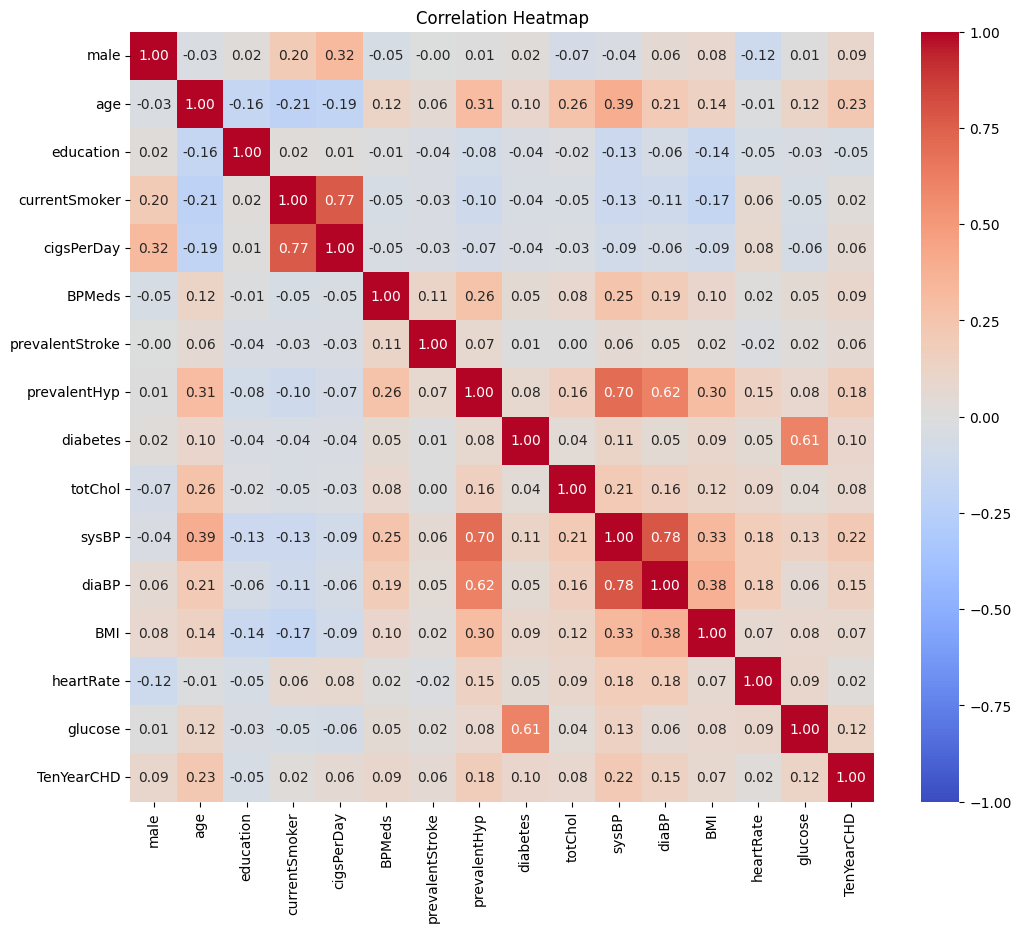

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# **Feature Engineering**

The broader process of transforming raw data into meaningful features that better represent the underlying patterns for machine learning models. It includes:

1. **Creating new features** (e.g., combining existing features, extracting useful information)
2. **Transforming features** (e.g., normalization, encoding categorical variables)
3. **Handling missing values**
4. **Scaling and standardizing features**
5. **Selecting important features** (which is a subset of feature engineering)

## **Why data needs to be Standardized:**
Standardizing the data helps algorithms, like linear regression, treat all features equally without being biased by features with larger ranges (e.g., `age` vs. `sysBP`).

When using standardization with StandardScaler, the values are transformed in such a way that:

1. The mean of each feature is 0.
2. The standard deviation of each feature is 1.

## Important notes
- Standardization doesn’t limit the values to a fixed range (unlike normalization which maps values to, say, [0, 1]).

- If the original values had significant outliers, the standardized values may also include extreme values (beyond -3 or +3).

# **Building a Support Vector Machine Classifier Model**

Accuracy: 0.86


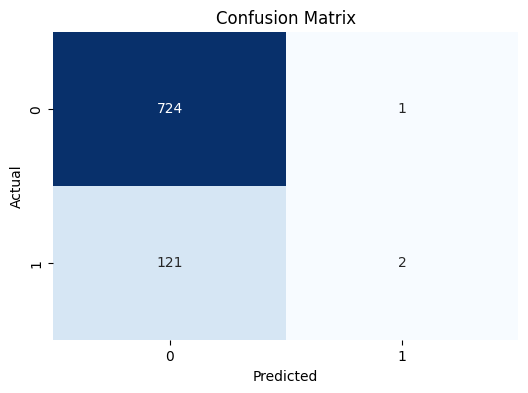

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       0.67      0.02      0.03       123

    accuracy                           0.86       848
   macro avg       0.76      0.51      0.48       848
weighted avg       0.83      0.86      0.79       848

ROC-AUC Score: 0.60


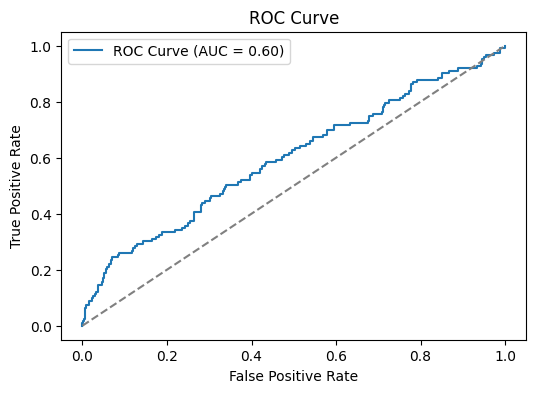

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load your dataset
# Assuming 'df' is your DataFrame
X = df[['age', 'sysBP', 'totChol', 'currentSmoker', 'glucose', 'BMI', 'prevalentHyp', 'diabetes', 'cigsPerDay', 'diaBP']]
y = df['TenYearCHD']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize SVM Model
# Here we're using the RBF kernel, which is common for non-linear problems.
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Step 5: Train the model on the training data
svm_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Step 7: Evaluate the model

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# 4. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Step 8: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
import pickle
import os

# Train the SVM model
svm_model.fit(X_train, y_train)

# Define the file path where you want to save the model
file_path = '/content/modelsvm.pkl'

# Save the trained model to a file
with open(file_path, 'wb') as file:
    pickle.dump(svm_model, file)

# Print a success message and show the file path
print(f'Model saved successfully at: {os.path.abspath(file_path)}')


Model saved successfully at: /content/modelsvm.pkl


In [ ]:
import pickle
import numpy as np

# Load the trained SVM model from the pkl file
with open('modelsvm.pkl', 'rb') as file:
    svm_model = pickle.load(file)

# New data for prediction
new_data = np.array([[45, 120, 220, 1, 85, 24.5, 1, 0, 15, 80]])

# Make prediction
prediction = svm_model.predict(new_data)

# Print result
if prediction[0] == 1:
    print("The model predicts that the person will have heart disease within 10 years.")
else:
    print("The model predicts that the person will not have heart disease within 10 years.")


The model predicts that the person will not have heart disease within 10 years.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Example: Get user input for unseen data
# Replace these values with actual input from a user (age, sysBP, totChol, etc.)
age = float(input("Enter age: "))
sysBP = float(input("Enter systolic blood pressure: "))
totChol = float(input("Enter total cholesterol: "))
currentSmoker = int(input("Is the person a current smoker? (1 for Yes, 0 for No): "))
glucose = float(input("Enter glucose level: "))
BMI = float(input("Enter BMI: "))
prevalentHyp = int(input("Does the person have prevalent hypertension? (1 for Yes, 0 for No): "))
diabetes = int(input("Does the person have diabetes? (1 for Yes, 0 for No): "))
cigsPerDay = float(input("Enter number of cigarettes smoked per day: "))
diaBP = float(input("Enter diastolic blood pressure: "))

# Create an array for the new unseen data
new_data = np.array([[age, sysBP, totChol, currentSmoker, glucose, BMI, prevalentHyp, diabetes, cigsPerDay, diaBP]])

# Make a prediction
prediction = svm_model.predict(new_data)

# Display the prediction result
if prediction[0] == 1:
    print("The model predicts that the person will have heart disease within 10 years.")
else:
    print("The model predicts that the person will not have heart disease within 10 years.")


Enter age: 19
Enter systolic blood pressure: 100
Enter total cholesterol: 200
Is the person a current smoker? (1 for Yes, 0 for No): 0
Enter glucose level: 140
Enter BMI: 18.1
Does the person have prevalent hypertension? (1 for Yes, 0 for No): 0
Does the person have diabetes? (1 for Yes, 0 for No): 0
Enter number of cigarettes smoked per day: 2
Enter diastolic blood pressure: 70
The model predicts that the person will not have heart disease within 10 years.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Example: Get user input for unseen data
# Replace these values with actual input from a user (age, sysBP, totChol, etc.)
age = float(input("Enter age: "))
sysBP = float(input("Enter systolic blood pressure: "))
totChol = float(input("Enter total cholesterol: "))
currentSmoker = int(input("Is the person a current smoker? (1 for Yes, 0 for No): "))
glucose = float(input("Enter glucose level: "))
BMI = float(input("Enter BMI: "))
prevalentHyp = int(input("Does the person have prevalent hypertension? (1 for Yes, 0 for No): "))
diabetes = int(input("Does the person have diabetes? (1 for Yes, 0 for No): "))
cigsPerDay = float(input("Enter number of cigarettes smoked per day: "))
diaBP = float(input("Enter diastolic blood pressure: "))

# Create an array for the new unseen data
new_data = np.array([[age, sysBP, totChol, currentSmoker, glucose, BMI, prevalentHyp, diabetes, cigsPerDay, diaBP]])

# Make a prediction
prediction = svm_model.predict(new_data)

# Display the prediction result
if prediction[0] == 1:
    print("The model predicts that the person will have heart disease within 10 years.")
else:
    print("The model predicts that the person will not have heart disease within 10 years.")


Enter age: 20
Enter systolic blood pressure: 120
Enter total cholesterol: 200
Is the person a current smoker? (1 for Yes, 0 for No): 1
Enter glucose level: 100
Enter BMI: 25.4
Does the person have prevalent hypertension? (1 for Yes, 0 for No): 0
Does the person have diabetes? (1 for Yes, 0 for No): 0
Enter number of cigarettes smoked per day: 2
Enter diastolic blood pressure: 70
The model predicts that the person will not have heart disease within 10 years.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
